In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv('/kaggle/input/credit-suisse-collapse/tweets.csv')

In [8]:
df.shape

(23903, 12)

In [9]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source'],
      dtype='object')

In [10]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,Global Capital Asset Management™,London I New York I Hong Kong,Official Global Capital Asset Management™ Twit...,2016-12-13 15:48:08+00:00,304.0,68,745,False,2023-05-17 20:37:41+00:00,Swiss banking giant #UBS on Tuesday said it wa...,"['UBS', 'CreditSuisse']",Twitter for Android
1,Mint,India,Breaking news and analyses of Indian and world...,2008-11-27 09:07:38+00:00,2084527.0,94,465,False,2023-05-17 20:15:00+00:00,Swiss bank #UBS said that it has set aside $4 ...,['UBS'],TweetDeck
2,emojized.com,"Zurich, Switzerland",All Images are cc licenced as far as i know,2014-01-17 08:05:40+00:00,1429.0,1936,325,False,2023-05-17 19:39:05+00:00,Bank crash raises questions on stability. #Cre...,['CreditSuisse'],WP Plugin Dev Com
3,emojized.com,"Zurich, Switzerland",All Images are cc licenced as far as i know,2014-01-17 08:05:40+00:00,1429.0,1936,325,False,2023-05-17 19:29:03+00:00,Bank crash raises questions on stability. #Cre...,['CreditSuisse'],WP Plugin Dev Com
4,emojized.com,"Zurich, Switzerland",All Images are cc licenced as far as i know,2014-01-17 08:05:40+00:00,1429.0,1936,325,False,2023-05-17 19:17:05+00:00,Investors lose faith in banking system. #Credi...,['CreditSuisse'],WP Plugin Dev Com


In [11]:
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
23898,AGHOR SHIV,NaN,NON HINDU...NON RELIGIOUS...NON DUALIST...BRAH...,2014-07-21 18:03:05+00:00,16.0,166,17,False,2023-03-19 14:46:21+00:00,"FT ON CS: This is a messy,ugly transaction, no...",NaN,Twitter for Android
23899,0xGeorge,NaN,News About #Blockchain #Crypto #Bitcoin #NFTs ...,2021-11-02 17:05:23+00:00,15.0,29,131,False,2023-03-19 14:42:23+00:00,#Switzerland considers nationalizing #CreditSu...,"['Switzerland', 'CreditSuisse']",Twitter for Android
23900,Ketul Parmar,China/Russia/USA/India/Africa,"Democracy is an illusion.\nYuan, Ruble, Euro, ...",2020-02-14 14:40:21+00:00,1127.0,437,211727,False,2023-03-19 14:35:50+00:00,#BREAKING:\nSWITZERLAND WEIGHS NATIONALIZING C...,"['BREAKING', 'CreditSuisse']",Twitter for Android
23901,Vinay Thakur 🥸,"Pune, India",Low latency C++ developer | Doge ❤️ ❤️and VRA ...,2010-01-30 07:04:26+00:00,101.0,914,26091,False,2023-03-19 14:23:52+00:00,@elonmusk Pls buy $CS #CreditSuisse,['CreditSuisse'],Twitter for Android
23902,Mr.HSC,"Los Angeles, CA",Writer🤑Web3.0👻Investor😼Entrepreneur 🎾 🥊 🎿 🏋️‍♀...,2023-01-30 16:35:28+00:00,37.0,67,74,False,2023-03-19 14:23:03+00:00,the best come back story Iqbal Khan can have n...,NaN,Twitter Web App


In [12]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
dtype: object

In [13]:
# checking duplicate values if any
df.duplicated().sum()



4

In [14]:
# checking missing values if any

df.isnull().sum()

user_name              0
user_location       6451
user_description    1263
user_created           1
user_followers         1
user_friends           1
user_favourites        1
user_verified          1
date                   1
text                   1
hashtags            4938
source                 2
dtype: int64

In [15]:
# Handling missing values
df.dropna(subset=['user_created','user_followers','user_friends','user_favourites','user_verified','date','text'],axis=0,inplace=True)

In [16]:
# Fixing index after dropping values
df.reset_index(drop=True,inplace=True)

In [17]:
df[df['user_location'].isnull()]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
21,Meritas,NaN,Join the Meritas Community to learn about Stoc...,2022-01-03 16:37:14+00:00,767.0,150,166,False,2023-05-17 16:30:13+00:00,UBS says it was rushed into unwanted Credit Su...,"['UBS', 'creditsuisse', 'meritas']",Hootsuite Inc.
24,alex,NaN,"Stock futures, Oil, Gold, FX Trader. Music, Mo...",2013-01-11 10:36:32+00:00,1820.0,112,34387,False,2023-05-17 15:52:48+00:00,"#CreditSuisse \nLol, CDS panel declared no eve...",['CreditSuisse'],Twitter for Android
36,Bitprismia,NaN,Bitprismia is an all-in-one cryptocurrency new...,2023-04-04 04:04:09+00:00,5.0,29,40,False,2023-05-17 14:03:34+00:00,UBS prepares for a $17B fallout after its abru...,NaN,Twitter Web App
40,Scytale News,NaN,Scytale News's goal is to bring together all t...,2022-07-15 08:19:54+00:00,125.0,90,81,False,2023-05-17 13:54:05+00:00,Swiss bank UBS said that it has set aside $4 b...,NaN,Twitter Web App
50,MoneyRants,NaN,Empowering your financial journey 💰 https://t....,2023-02-03 18:11:15+00:00,7.0,24,10,False,2023-05-17 12:24:45+00:00,UBS braces for a $17B hit after the rushed tak...,NaN,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,CorLo,NaN,NaN,2022-04-05 08:12:26+00:00,8.0,82,90,False,2023-03-19 16:36:21+00:00,#CreditSuisse Credit Suisse’s AT1 bond are exp...,['CreditSuisse'],Twitter for Mac
23887,CorLo,NaN,NaN,2022-04-05 08:12:26+00:00,8.0,82,90,False,2023-03-19 16:26:31+00:00,#CreditSuisse Press conference announced by Sw...,['CreditSuisse'],Twitter for Mac
23894,TalesFromTheFuture,NaN,Ninja eyes peeled on underrated longs and bubb...,2009-07-08 10:21:31+00:00,2504.0,3407,136424,False,2023-03-19 15:30:14+00:00,@zac1967 Realität: \n\n“Credit Suisse bonds pl...,NaN,Twitter for iPhone
23897,AGHOR SHIV,NaN,NON HINDU...NON RELIGIOUS...NON DUALIST...BRAH...,2014-07-21 18:03:05+00:00,16.0,166,17,False,2023-03-19 14:46:21+00:00,"FT ON CS: This is a messy,ugly transaction, no...",NaN,Twitter for Android


In [18]:
df['user_location'].fillna('NS',inplace=True)

In [19]:
df.drop(['user_description','hashtags'],axis=1,inplace=True)

In [20]:
df.shape

(23902, 10)

In [21]:
df.dropna(subset=['source'],axis=0,inplace=True)

In [22]:
df.isnull().sum()

user_name          0
user_location      0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
dtype: int64

In [23]:
df.describe()

,user_followers
count,2.390100e+04
mean,4.426111e+04
std,3.951589e+05
min,0.000000e+00
25%,1.280000e+02
50%,8.740000e+02
75%,2.057000e+03
max,1.468577e+07


# Changing datatypes 

In [24]:
df['user_friends'] = df['user_friends'].astype(int)

In [25]:
df['user_favourites'] = df['user_favourites'].astype(int)

In [26]:
df.dtypes

user_name           object
user_location       object
user_created        object
user_followers     float64
user_friends         int64
user_favourites      int64
user_verified       object
date                object
text                object
source              object
dtype: object

# Data Visualisation

# Univariate Analysis

In [27]:
df.user_location.value_counts()[:10]

NS                     6451
Zurich, Switzerland    3331
India                   768
Mumbai, India           314
United States           298
London, England         266
London                  190
Global                  174
New York, USA           159
United Kingdom          157
Name: user_location, dtype: int64

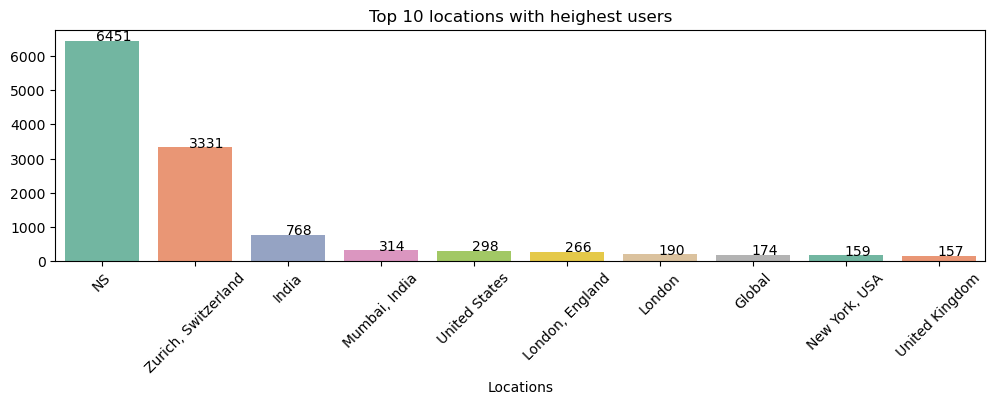

In [28]:
plt.figure(figsize=(12,3))
vc = df.user_location.value_counts()[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=df, palette='Set2')

for i in range(10):
    value = vc[i]
    g.text(y= value -2,x=i +0.125, s=value , color='black',ha='center',fontsize=10)

plt.xticks(rotation=45)
plt.xlabel('Locations')
plt.title('Top 10 locations with heighest users')
plt.show()    



#### Observations :- NS stands for Not Specified so Switzerland(718) tops the list followed India(491) & England(221).

In [29]:
df.user_name.value_counts()[:10]

emojized.com                        3252
Stanley Epstein Training             171
Britany Henry, Master of Science     150
Crypto Avanza                        148
Abhipra                              135
BQ Prime                             133
2nd Democracy (Ignazio Alboré)       123
Nivya Krishna                        104
Herrlein                              94
finews_asia                           73
Name: user_name, dtype: int64

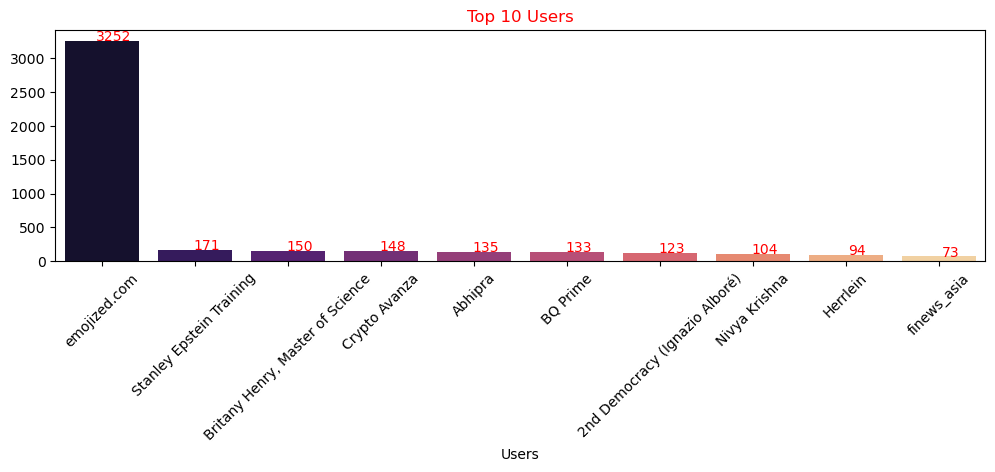

In [30]:
plt.figure(figsize=(12,3))

vc= df.user_name.value_counts()[:10]
g = sns.barplot(x= vc.index , y= vc.values , data= df, palette='magma')

for i in range(10):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Red',ha='center',fontsize=10)

plt.xlabel('Users')
plt.xticks(rotation=45)
plt.title('Top 10 Users', color='Red')
plt.show()    



#### Observations :- Emojized.com Twitted the most, followed by Briteny Henry & Crypto Avanza 

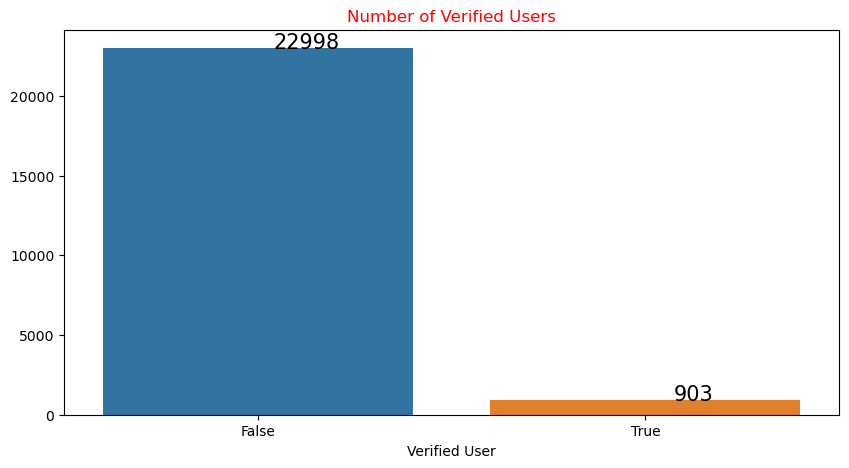

In [31]:
plt.figure(figsize=(10,5))
vc= df.user_verified.value_counts()
g = sns.barplot(x= vc.index , y= vc.values , data= df)

for i in range(2):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Black',ha='center',fontsize=15)

plt.xlabel('Verified User')
plt.title('Number of Verified Users', color='Red')
plt.show()    


###
# Observations :- Trend is strange as we can see majority of the users twitted are not Verified.

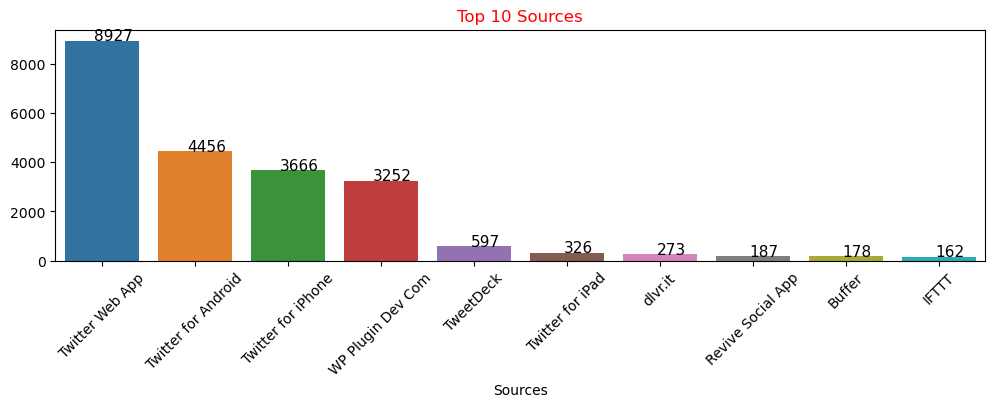

In [32]:
plt.figure(figsize=(12,3))
vc= df.source.value_counts()[:10]
g = sns.barplot(x= vc.index , y= vc.values , data= df)

for i in range(10):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Black',ha='center',fontsize=11)

plt.xlabel('Sources')
plt.xticks(rotation=45)
plt.title('Top 10 Sources', color='Red')
plt.show()



#### Observations :- Most of the users are from Twitter web app(5787) followed by Twitter for android(3252)
####& Iphone(2517)

# Bivariate Analysis

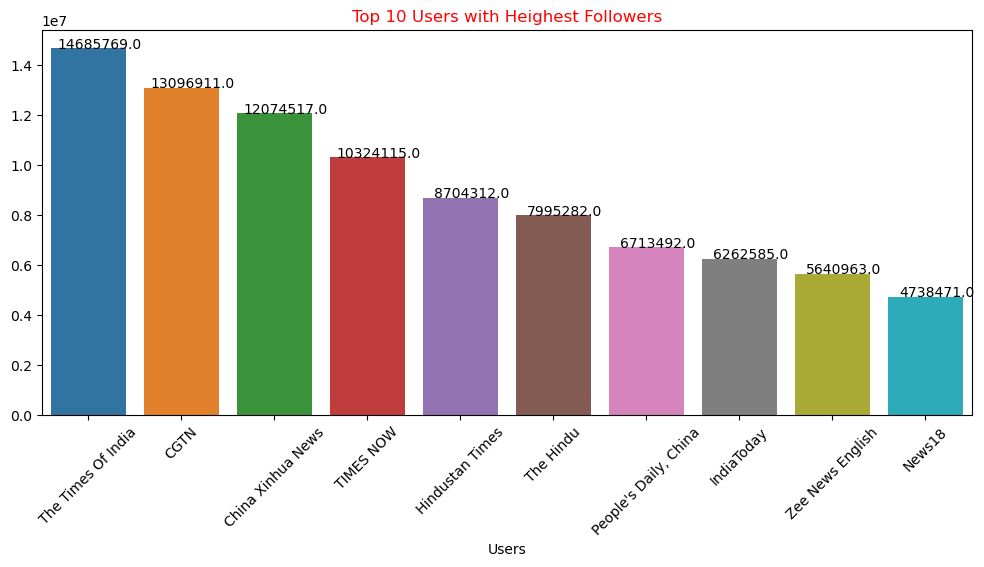

In [33]:
plt.figure(figsize=(12,5))
vc=df.groupby(['user_name'])['user_followers'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=df)
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 10 Users with Heighest Followers',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=45)
plt.show()    



#### observation = Times of India(14685769) Tops the list followed by CGTN(13096911  & China Xinhua News(12074517) 

In [34]:
import warnings
warnings.filterwarnings("ignore")

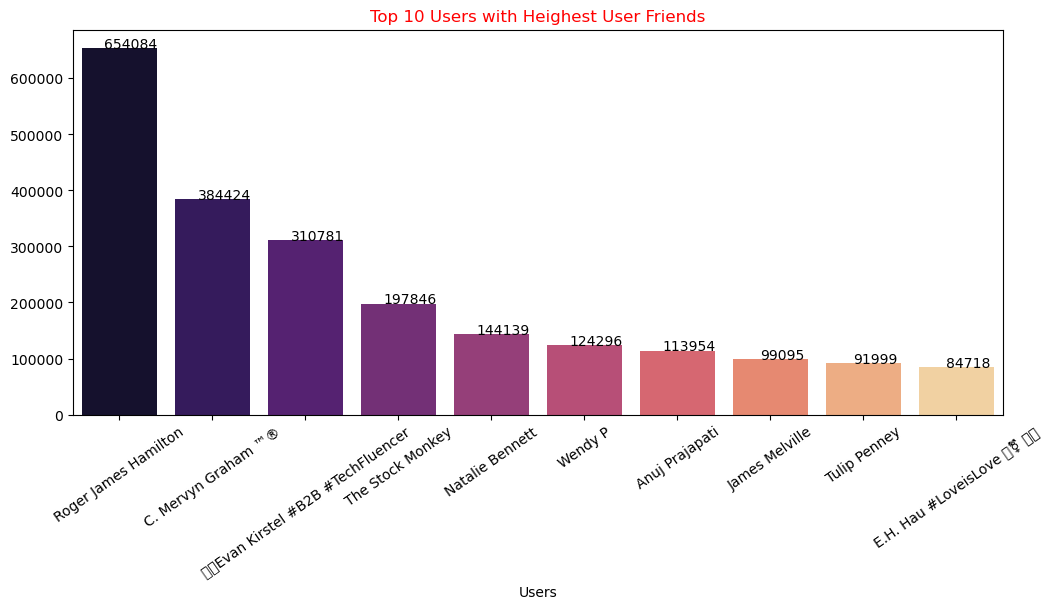

In [35]:
plt.figure(figsize=(12,5))
vc=df.groupby(['user_name'])['user_friends'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=df, palette='magma')
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 10 Users with Heighest User Friends',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=35)
plt.show()   



#### Hamiliton tops the list followed by Evan Crystal & The stock Monkey

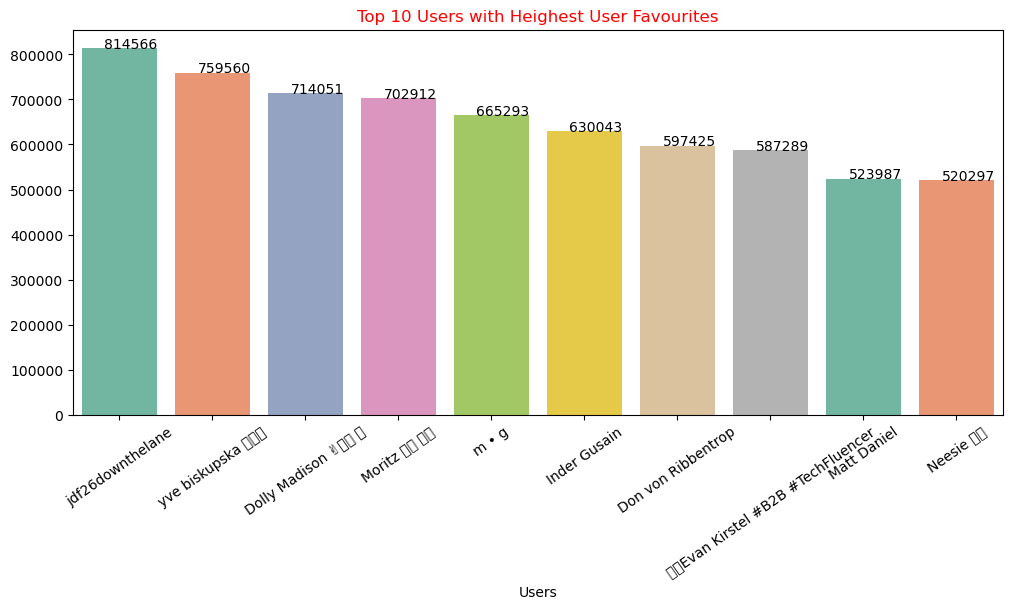

In [36]:
plt.figure(figsize=(12,5))
vc=df.groupby(['user_name'])['user_favourites'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=df, palette='Set2')
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 10 Users with Heighest User Favourites',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=35)
plt.show()



#### Observations :- Yve Biskupska tops the list followed by Moritz & Inder Gusin.